# CSC 215 - Final Project

# Gender Classification with Deep Learning

## Khoi Hoang

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from IPython.display import Markdown, display
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Helper function
# Print markdown style
def printmd(string):
    display(Markdown(string))
    
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Manually load images

In [63]:
IMAGES_DIRECTORY = "C:/Users/hgdan/Downloads/lfw-deepfunneled/"

In [64]:
people = os.listdir(path=IMAGES_DIRECTORY)
print("There are {} people in the full lfw dataset.".format(len(people)))

There are 5749 people in the full lfw dataset.


In [65]:
image_array = []
for directory in os.listdir(IMAGES_DIRECTORY):
    image_dir = IMAGES_DIRECTORY + directory #go to sub directories
    for image in os.listdir(image_dir):
        image = plt.imread(os.path.join(image_dir, image))
        image = cv2.resize(image, (100, 100))
        image_array.append(image)

In [66]:
image_array = np.array(image_array)
image_array.shape

(13233, 100, 100, 3)

In [67]:
#test = cv2.resize(image_array[0], (62, 47))

In [68]:
#test

#### Making the gender labels for the output

In [12]:
df_male = pd.read_csv("gender_labels/male_names.txt")
df_female = pd.read_csv("gender_labels/female_names.txt")

In [13]:
df_female.head()

,Pics
0,Claudia_Coslovich_0001.jpg
1,Allison_Searing_0001
2,Elizabeth_Hill_0001.jpg
3,Erika_Reyes_0001.jpg
4,Tatiana_Shchegoleva_0001.jpg


In [14]:
# Helper function to convert the df into list of names for males or females
def gender_to_list(df):
    temp = df.values
    temp = temp.reshape(temp.shape[0],)
    
    res = []
    for each in temp:
        each = each.rsplit('_', 1)[0]
        res.append(each)
    
    return res

In [15]:
male = gender_to_list(df_male)
female = gender_to_list(df_female)

In [16]:
female[0:5]

['Claudia_Coslovich',
 'Allison_Searing',
 'Elizabeth_Hill',
 'Erika_Reyes',
 'Tatiana_Shchegoleva']

In [17]:
gender_target = []
for each in os.listdir(IMAGES_DIRECTORY): #iterate through the subdir
    if each in male:
        for i in range(len(os.listdir(IMAGES_DIRECTORY + each))):
            gender_target.append('male')
    elif each in female:
        for i in range(len(os.listdir(IMAGES_DIRECTORY + each))):
            gender_target.append('female')
    else:
        print(each)

In [18]:
gender_target = np.array(gender_target)
gender_target.shape

(13233,)

In [19]:
gender_target

array(['male', 'male', 'male', ..., 'female', 'male', 'male'], dtype='<U6')

# Load data from sklearn

In [267]:
from sklearn.datasets import fetch_lfw_people

In [268]:
lfw_people = fetch_lfw_people(color = True)

In [269]:
lfw_people.images.shape

(13233, 62, 47, 3)

In [270]:
lfw_people.target_names.shape

(5749,)

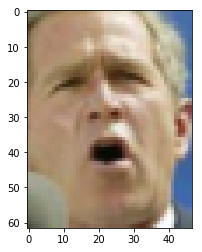

In [272]:
sample = 277
each = lfw_people.images[sample]

plt.figure()
plt.imshow(each/255)

In [273]:
lfw_people.target_names

array(['AJ Cook', 'AJ Lamas', 'Aaron Eckhart', ..., 'Zumrati Juma',
       'Zurab Tsereteli', 'Zydrunas Ilgauskas'], dtype='<U35')

#### Making gender labels for the output

In [274]:
df_male = pd.read_csv("gender_labels/male_names.txt")
df_female = pd.read_csv("gender_labels/female_names.txt")

In [275]:
df_male.shape

(10268, 1)

In [276]:
# Helper function to convert the df into list of names for males or females
def gender_to_list(df):
    temp = df.values
    temp = temp.reshape(temp.shape[0],)
    
    res = []
    for each in temp:
        each = each.replace('_', ' ').rsplit(' ', 1)[0]
        res.append(each)
    
    return res

In [277]:
male = gender_to_list(df_male)
female = gender_to_list(df_female)

In [278]:
female[0:5]

['Claudia Coslovich',
 'Allison Searing',
 'Elizabeth Hill',
 'Erika Reyes',
 'Tatiana Shchegoleva']

In [279]:
np.where(lfw_people.target_names=='Claudia Coslovich')

(array([1020], dtype=int64),)

In [280]:
lfw_people.target_names[0]

'AJ Cook'

In [281]:
np.where(lfw_people.target==1020)

(array([4095], dtype=int64),)

In [282]:
y = []
for each in lfw_people.target: #iterate through the ids
    if lfw_people.target_names[each] in male:
        y.append('male')
    elif lfw_people.target_names[each] in female:
        y.append('female')
    else:
        print(each)

In [283]:
y = np.array(y)

In [284]:
y.shape

(13233,)

In [285]:
lfw_people.target.shape

(13233,)

In [286]:
np.unique(y, return_counts=True)

(array(['female', 'male'], dtype='<U6'), array([ 2962, 10271], dtype=int64))

In [287]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [288]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([ 2962, 10271], dtype=int64))

In [289]:
dummies = pd.get_dummies(y)
dummies.head()

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [290]:
y = dummies.values.astype(np.float32)
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

# Deep CNN model

In [29]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import optimizers, regularizers
from sklearn import metrics
from keras.optimizers import Adam

Using TensorFlow backend.


In [77]:
x_train, x_test, y_train, y_test = train_test_split(image_array, gender_target, test_size=0.2, random_state=43)
#x_train, x_test, y_train, y_test = train_test_split(lfw_people.images, y, test_size=0.2, random_state=43)

In [78]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(9263, 100, 100, 3)
(9263,)
(3970, 100, 100, 3)
(3970,)


In [79]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [80]:
y_train

array(['male', 'female', 'female', ..., 'male', 'male', 'male'],
      dtype='<U6')

In [81]:
# Label encode the gender
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [82]:
# One hot encode the gender
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [83]:
y_test[0:5]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [84]:
checkpointer = ModelCheckpoint(filepath="save/cnn_1.hdf5", verbose=0, save_best_only=True) # save best model
#input_shape = (250, 250, 3)
input_shape = (100, 100, 3)
learning_rate = 0.001

#Build network
model = Sequential()

model.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='relu',
                 input_shape=input_shape)) 
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.25)) 

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.25)) 

model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.25)) 

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train, validation_data=(x_test,y_test), callbacks=[monitor,checkpointer],verbose=1,epochs=50, batch_size=64, shuffle=True)    # Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.
    
print('Training finished...Loading the best model')  
print()
model.load_weights('save/cnn_1.hdf5') # load weights from best model

Train on 9263 samples, validate on 3970 samples
Epoch 1/50
9263/9263 [==============================] - 27s 3ms/step - loss: 0.5464 - acc: 0.7745 - val_loss: 0.4018 - val_acc: 0.7950
Epoch 2/50
9263/9263 [==============================] - 22s 2ms/step - loss: 0.3610 - acc: 0.8361 - val_loss: 0.3166 - val_acc: 0.8602
Epoch 3/50
9263/9263 [==============================] - 22s 2ms/step - loss: 0.3033 - acc: 0.8674 - val_loss: 0.2710 - val_acc: 0.8866
Epoch 4/50
9263/9263 [==============================] - 22s 2ms/step - loss: 0.2406 - acc: 0.8998 - val_loss: 0.2012 - val_acc: 0.9179
Epoch 5/50
9263/9263 [==============================] - 22s 2ms/step - loss: 0.2051 - acc: 0.9170 - val_loss: 0.1871 - val_acc: 0.9257
Epoch 6/50
9263/9263 [==============================] - 22s 2ms/step - loss: 0.1818 - acc: 0.9284 - val_loss: 0.1586 - val_acc: 0.9373
Epoch 7/50
9263/9263 [==============================] - 22s 2ms/step - loss: 0.1578 - acc: 0.9386 - val_loss: 0.1644 - val_acc: 0.9360
Epoch 8

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 98, 98, 96)        2688      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 96)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 49, 49, 96)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 49, 49, 256)       221440    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 256)       0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 512)       1180160   
__________

-----------------**Convolutional Neural Network Report**---------------

F1 score: 0.9498250491876485
Accuracy score: 0.9501259445843828
Confusion matrix: 
 [[ 787  114]
 [  84 2985]]
Plotting confusion matrix


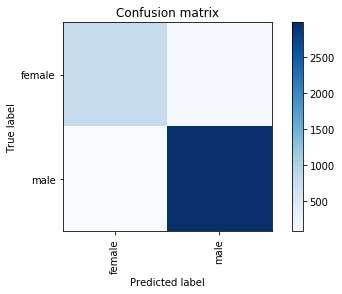

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       901
           1       0.96      0.97      0.97      3069

   micro avg       0.95      0.95      0.95      3970
   macro avg       0.93      0.92      0.93      3970
weighted avg       0.95      0.95      0.95      3970



In [86]:
cnn_pred = model.predict(x_test)
cnn_pred = np.argmax(cnn_pred,axis=1)
y_true = np.argmax(y_test,axis=1)

cnn_f1 = metrics.f1_score(y_true, cnn_pred, average= "weighted")
cnn_accuracy = metrics.accuracy_score(y_true, cnn_pred)
cnn_cm = metrics.confusion_matrix(y_true, cnn_pred)
printmd("-----------------**Convolutional Neural Network Report**---------------")
print("F1 score: {}".format(cnn_f1))
print("Accuracy score: {}".format(cnn_accuracy))
print("Confusion matrix: \n", cnn_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(cnn_cm, ["female", "male"])
plt.show()

print(metrics.classification_report(y_true, cnn_pred))

# Principal Component Analysis (PCA)

In [3]:
IMAGES_DIRECTORY = "C:/Users/hgdan/Downloads/lfw-deepfunneled/"

In [4]:
people = os.listdir(path=IMAGES_DIRECTORY)
print("There are {} people in the full lfw dataset.".format(len(people)))

There are 5749 people in the full lfw dataset.


In [5]:
image_array = []
for directory in os.listdir(IMAGES_DIRECTORY):
    image_dir = IMAGES_DIRECTORY + directory #go to sub directories
    for image in os.listdir(image_dir):
        image = plt.imread(os.path.join(image_dir, image))
        image = cv2.resize(image, (100, 100))
        image_array.append(image)

In [6]:
image_array = np.array(image_array)
image_array.shape

(13233, 100, 100, 3)

In [7]:
image_array_pca = image_array.reshape(image_array.shape[0], 100*100*3)
image_array_pca.shape

(13233, 30000)

In [8]:
from sklearn.decomposition import PCA

# fit the PCA with the original images
pca = PCA().fit(image_array_pca)

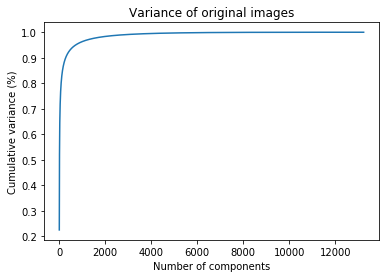

In [9]:
# Plot the cumulative sum of variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative variance (%)') #for each component
plt.title('Variance of original images')
plt.show()

The Variance graph showed that by using around 2000 components, we can retain approximately 97% of the data

In [9]:
pca = PCA(n_components=2000)
input_pca = pca.fit_transform(image_array_pca)

In [10]:
input_pca.shape

(13233, 2000)

# SVM model

In [20]:
x_train, x_test, y_train, y_test = train_test_split(input_pca, gender_target, test_size=0.2, random_state=43)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10586, 2000)
(10586,)
(2647, 2000)
(2647,)


In [22]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [23]:
y_train

array(['male', 'male', 'male', ..., 'male', 'male', 'male'], dtype='<U6')

In [24]:
# Label encode the gender
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [25]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([ 585, 2062], dtype=int64))

In [26]:
from sklearn.svm import SVC

svc = SVC(kernel='poly', gamma='auto')
svc.fit(x_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

-----------------**SVM Report**---------------

F1 score: 0.8501550300747599
Accuracy score: 0.8587079712882508
Confusion matrix: 
 [[ 318  267]
 [ 107 1955]]
Plotting confusion matrix


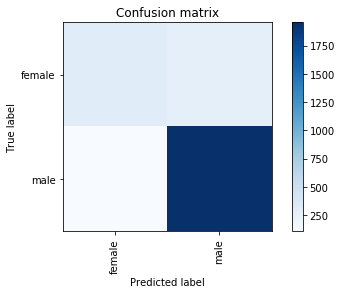

              precision    recall  f1-score   support

           0       0.75      0.54      0.63       585
           1       0.88      0.95      0.91      2062

   micro avg       0.86      0.86      0.86      2647
   macro avg       0.81      0.75      0.77      2647
weighted avg       0.85      0.86      0.85      2647



In [31]:
y_pred_svc = svc.predict(x_test)
svc_f1 = metrics.f1_score(y_test, y_pred_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_pred_svc)
svc_cm = metrics.confusion_matrix(y_test, y_pred_svc)
printmd("-----------------**SVM Report**---------------")
print("F1 score: {}".format(svc_f1))
print("Accuracy score: {}".format(svc_accuracy))
print("Confusion matrix: \n", svc_cm)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(svc_cm, ['female', 'male'])
plt.show()

print(metrics.classification_report(y_test, y_pred_svc))